In [1]:
import pandas as pd

In [18]:
trainData=pd.read_csv("../data/train_set.csv", sep="\t")
print("data shape={}".format(trainData.shape))
trainData.head(3)

data shape=(200000, 2)


,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...


In [21]:
testAData=pd.read_csv("../data/test_a.csv", sep="\t")
print("data shape={}".format(testAData.shape))
testAData.head(3)

data shape=(50000, 1)


,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...


In [20]:
label2id={'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
print("{} labels".format(len(label2id)))

14 labels


# 数据分析

In [22]:
trainData["length"]=trainData["text"].map(lambda x: len(x.split(" ")))

In [27]:
trainData["label"].value_counts()

0     38918
1     36945
2     31425
3     22133
4     15016
5     12232
6      9985
7      8841
8      7847
9      5878
10     4920
11     3131
12     1821
13      908
Name: label, dtype: int64

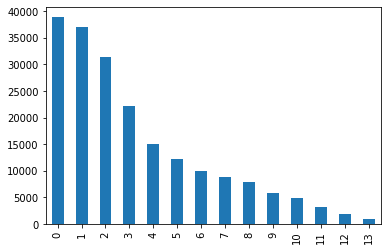

In [26]:
trainData["label"].value_counts().plot(kind="bar")

In [28]:
trainData["length"].value_counts()

321     220
500     214
452     213
316     211
252     208
       ... 
5797      1
5859      1
5925      1
6053      1
6247      1
Name: length, Length: 5633, dtype: int64

In [29]:
trainData["text"].value_counts()

2538 2506 1363 5466 3772 340 922 433 2397 5778 6656 6609 6122 2525 1702 7495 2435 62 3300 7539 5330 3568 5413 619 3648 5370 3530 2446 459 4167 3750 6740 1699 7543 6930 4893 2444 1460 6122 1679 5036 7363 648 1903 4893 541 6104 340 3263 5949 3750 4969 1279 2364 6101 648 7495 5801 3530 6508 3750 7495 2435 669 6333 2538 4822 6833 1722 2112 340 4531 541 2112 3750 6122 3731 4811 910 6759 5036 648 4811 2121 4409 6286 3750 5948 4679 4650 2693 6713 5612 648 151 2446 1699 1952 3750 4017 920 5096 2539 6045 478 7239 1241 3056 900 5028 4151 7539 2397 5778 922 433 2471 5011 7539 2465 2109 619 4464 1324 4741 4958 7055 2465 1324 6252 4464 1324 2380 1854 7055 6644 1324 6252 1324 2400 2112 7055 6644 2799 6252 6644 1324 2984 1854 7055 4063 619 6644 2799 7134 2376 900 2465 4677 3775 2252 1702 922 885 1633 1633 1985 3915 922 885                                                                                                                                                                                     

In [23]:
trainData.describe()

,label,length
count,200000.000000,200000.000000
mean,3.210950,907.207110
std,3.084955,996.029036
min,0.000000,2.000000
25%,1.000000,374.000000
50%,2.000000,676.000000
75%,5.000000,1131.000000
max,13.000000,57921.000000


In [32]:
trainData.loc[0, "text"]

'2967 6758 339 2021 1854 3731 4109 3792 4149 1519 2058 3912 2465 2410 1219 6654 7539 264 2456 4811 1292 2109 6905 5520 7058 6045 3634 6591 3530 6508 2465 7044 1519 3659 2073 3750 3731 4109 3792 6831 2614 3370 4269 3370 486 5770 4109 4125 3750 5445 2466 6831 6758 3743 3630 1726 2313 5906 826 4516 657 900 1871 7044 3750 2967 3731 1757 1939 648 2828 4704 7039 3706 3750 965 2490 7399 3743 2145 2407 7451 3775 6017 5998 1641 299 4704 2621 7029 3056 6333 433 648 1667 1099 900 2289 1099 648 5780 220 7044 1279 7426 4269 3750 2967 6758 6631 3099 2205 7305 2620 5977 3750 3329 1793 6666 2042 3193 4149 1519 7039 3706 2446 5399 648 4124 2058 3912 248 3193 2252 5649 2212 4939 7239 3310 4525 2400 900 5770 4109 4125 7044 4921 265 1397 4699 1699 669 6407 3750 1271 1271 4741 669 4659 3870 4030 4167 5338 25 3466 6909 4417 1859 3750 1465 7194 648 3938 1571 848 6986 827 2124 3750 1991 7444 7037 2729 908 6308 3750 1889 6810 4190 591 5598 2289 2109 6831 6407 2400 5410 517 900 25 3731 4109 3792 4128 1679 4811 

In [36]:
# 构建字频表
char2tf={}
for i in range(trainData.shape[0]):
    t=trainData.iloc[i]["text"].split()
    for k in t:
        if k not in char2tf.keys():
            char2tf[k] = 1
        else:
            char2tf[k] += 1

In [37]:
max(char2tf.values())

7482224

In [39]:
min(char2tf.values())

1

In [38]:
len(char2tf)

6869

In [41]:
# 测试集
testchar2tf={}
for i in range(testAData.shape[0]):
    t=testAData.iloc[i]["text"].split()
    for k in t:
        if k not in char2tf.keys():
            if k not in testchar2tf.keys():
                testchar2tf[k] = 1
            else:
                testchar2tf[k] += 1
print("{} OOV chars in test data".format(len(testchar2tf)))

108 OOV chars in test data


In [42]:
print(max(testchar2tf.values()), min(testchar2tf.values()))

11 1


In [45]:
char2tf.keys()

dict_keys(['2967', '6758', '339', '2021', '1854', '3731', '4109', '3792', '4149', '1519', '2058', '3912', '2465', '2410', '1219', '6654', '7539', '264', '2456', '4811', '1292', '2109', '6905', '5520', '7058', '6045', '3634', '6591', '3530', '6508', '7044', '3659', '2073', '3750', '6831', '2614', '3370', '4269', '486', '5770', '4125', '5445', '2466', '3743', '3630', '1726', '2313', '5906', '826', '4516', '657', '900', '1871', '1757', '1939', '648', '2828', '4704', '7039', '3706', '965', '2490', '7399', '2145', '2407', '7451', '3775', '6017', '5998', '1641', '299', '2621', '7029', '3056', '6333', '433', '1667', '1099', '2289', '5780', '220', '1279', '7426', '6631', '3099', '2205', '7305', '2620', '5977', '3329', '1793', '6666', '2042', '3193', '2446', '5399', '4124', '248', '2252', '5649', '2212', '4939', '7239', '3310', '4525', '2400', '4921', '265', '1397', '4699', '1699', '669', '6407', '1271', '4741', '4659', '3870', '4030', '4167', '5338', '25', '3466', '6909', '4417', '1859', '1465

In [44]:
testchar2tf.keys()

dict_keys(['2877', '1027', '5009', '1612', '942', '113', '1774', '5302', '4833', '5070', '381', '172', '2723', '6452', '2349', '7112', '4698', '2416', '3609', '1523', '6224', '4891', '3674', '2312', '4116', '4281', '409', '7293', '458', '1548', '3704', '73', '278', '7231', '6629', '4661', '6710', '2650', '5346', '7173', '6626', '7489', '3532', '995', '2242', '538', '1513', '3852', '6724', '3502', '5559', '2889', '5859', '3524', '737', '1729', '6306', '923', '3548', '4566', '2801', '3981', '491', '4259', '4391', '3516', '874', '2371', '2256', '2094', '7524', '7102', '5871', '3185', '6168', '2342', '3594', '2270', '937', '5124', '6884', '3777', '1301', '701', '4020', '4622', '85', '1668', '5185', '5083', '2509', '1602', '3162', '516', '6655', '1338', '7071', '1577', '585', '3149', '2235', '2844', '1371', '3429', '4308', '1085', '5699', '5321'])

In [47]:
max([int(i) for i in char2tf.keys()])

7549

In [48]:
max([int(i) for i in testchar2tf.keys()])

7524